In [99]:
import pandas as pd
import numpy as np
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [199]:
# 데이터 불러오기 
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

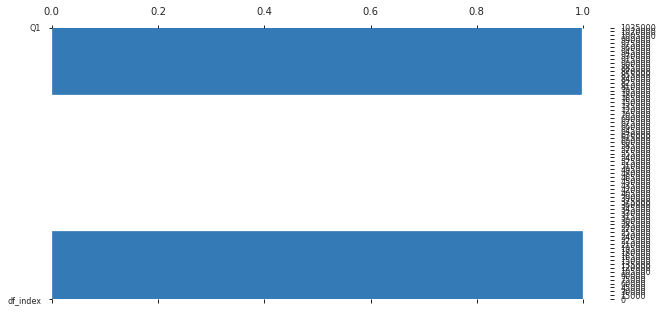

In [3]:
import pandas_profiling
pr=train.profile_report()
pr.to_file('./pr_report.html')

In [ ]:
# 기본 전처리 


# lapase 관련 변수는 skew가 심하므로 로그변환 처리

In [54]:
# 로그 변환
train.introelapse = np.log1p(train.introelapse)
train.testelapse = np.log1p(train.testelapse)
train.surveyelapse = np.log1p(train.surveyelapse)

test.introelapse = np.log1p(test.introelapse)
test.testelapse = np.log1p(test.testelapse)
test.surveyelapse = np.log1p(test.surveyelapse)

In [114]:
isnerd = train.drop(index = train[train['Q1'].notnull()].index)
isnerd.nerdiness.value_counts()

1    27
0    14
Name: nerdiness, dtype: int64

In [115]:
isnerd = train.drop(index = train[train['Q2'].notnull()].index)
isnerd.nerdiness.value_counts()

0    38
1    31
Name: nerdiness, dtype: int64

In [116]:
isnerd = train.drop(index = train[train['Q3'].notnull()].index)
isnerd.nerdiness.value_counts()

1    27
0    23
Name: nerdiness, dtype: int64

In [181]:
isnerd = train.drop(index = train[train['Q4'].notnull()].index)
isnerd.nerdiness.value_counts()

1    38
0    33
Name: nerdiness, dtype: int64

In [182]:
isnerd = train.drop(index = train[train['Q5'].notnull()].index)
isnerd.nerdiness.value_counts()

1    23
0    15
Name: nerdiness, dtype: int64

In [183]:
isnerd = train.drop(index = train[train['Q6'].notnull()].index)
isnerd.nerdiness.value_counts()

1    25
0    23
Name: nerdiness, dtype: int64

# question 답변 안함과 nerdiness는 크게 상관이 없어보임

In [118]:
isnerd = train.drop(index = train[train['TIPI1'].notnull()].index)
isnerd.nerdiness.value_counts()

0    47
1     6
Name: nerdiness, dtype: int64

In [176]:
pd.pivot_table(train, index = ['TIPI1'] , values = 'nerdiness', aggfunc= ['count','sum'])

,count,sum
,nerdiness,nerdiness
TIPI1,,
1.0,3098,2006
2.0,3451,2037
3.0,5414,2756
4.0,1954,958
5.0,1030,540


In [119]:
isnerd = train.drop(index = train[train['TIPI2'].notnull()].index)
isnerd.nerdiness.value_counts()

0    55
1    11
Name: nerdiness, dtype: int64

In [177]:
pd.pivot_table(train, index = ['TIPI2'] , values = 'nerdiness', aggfunc= ['count','sum'])

,count,sum
,nerdiness,nerdiness
TIPI2,,
1.0,1586,882
2.0,1969,1049
3.0,7062,3866
4.0,2932,1680
5.0,1385,815


In [120]:
isnerd = train.drop(index = train[train['TIPI3'].notnull()].index)
isnerd.nerdiness.value_counts()

0    63
1    16
Name: nerdiness, dtype: int64

In [179]:
pd.pivot_table(train, index = ['TIPI3'] , values = 'nerdiness', aggfunc= ['count','sum'])

,count,sum
,nerdiness,nerdiness
TIPI3,,
1.0,596,314
2.0,1161,654
3.0,6500,3461
4.0,4020,2313
5.0,2644,1545


In [121]:
isnerd = train.drop(index = train[train['TIPI4'].notnull()].index)
isnerd.nerdiness.value_counts()

0    60
1     4
Name: nerdiness, dtype: int64

In [122]:
isnerd = train.drop(index = train[train['TIPI5'].notnull()].index)
isnerd.nerdiness.value_counts()

0    62
1     8
Name: nerdiness, dtype: int64

## 결론: Tipi를 답변하지 않을 수록 nerd가 아닐 확률이 높다...?

# << missing 처리 기준 >>
# question은 최빈값으로 채우기
# TIPI는 0으로 새로운 응답변수 생성

In [ ]:
# 최빈값으로 채워줌
from scipy.stats import mode
question  = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
train[question] = train[question].mode()
test[question] = test[question].mode()

In [ ]:
# 0으로 채워줌 (새로운 변수 처럼 작동하도록)
tipi  = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
train[tipi] = train[tipi].fillna(0)
test[tipi] = test[tipi].fillna(0)

# 나이, 가족수 이상치 처리

#### 나이 답변을 이상하게 한 사람은은 nerd일까?

In [107]:
isnerd = train.drop(index = train[train['age'] < 100].index)
isnerd

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1019,1019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,2,39,172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,100,3.0,10.0,5.0,1.0,1.0,2919.0,1.0,0
1739,1739,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,CAN,2,68,121,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,2.0,3,3.0,2.0,123,1.0,2.0,4.0,2.0,1.0,3.0,2.0,0
4002,4002,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,5.0,5.0,5.0,3.0,5.0,CAN,2,68,121,3.0,4.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,4.0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,2.0,3,3.0,2.0,123,1.0,2.0,4.0,2.0,1.0,3.0,2.0,0
4976,4976,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,5.0,4.0,5.0,1.0,4.0,5.0,5.0,1.0,4.0,1.0,2.0,4.0,4.0,4.0,5.0,NOR,13,106,208,2.0,3.0,3.0,3.0,3.0,5.0,3.0,3.0,2.0,2.0,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,2.0,1,1.0,2.0,545,1.0,2.0,1.0,1.0,2.0,4.0,2.0,0
6725,6725,1.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,1.0,1.0,5.0,3.0,5.0,1.0,1.0,1.0,5.0,1.0,3.0,1.0,1.0,1.0,5.0,5.0,5.0,USA,8732,8663,300,3.0,2.0,4.0,3.0,4.0,3.0,4.0,2.0,3.0,1.0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,3.0,2,1.0,1.0,722,2.0,2.0,1.0,1.0,2.0,3.0,2.0,0
9273,9273,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,1.0,4.0,3.0,4.0,2.0,1.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,5.0,4.0,3.0,2.0,USA,1,89,125,1.0,5.0,1.0,5.0,5.0,1.0,4.0,5.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,2,2.0,1.0,38822,1.0,2.0,3.0,2.0,1.0,3.0,2.0,1
14135,14135,4.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,2.0,4.0,5.0,5.0,5.0,5.0,2.0,4.0,5.0,5.0,5.0,BWA,172,70,114,3.0,3.0,4.0,3.0,4.0,5.0,4.0,2.0,4.0,2.0,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,3.0,1,2.0,2.0,336,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1


크게 상관없는 듯 -> 이상치는 평균으로 채우기로 결정

In [112]:
isnerd = train.drop(index = train[train['familysize'].notnull()].index)
isnerd

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
41,41,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1.0,5.0,3.0,5.0,4.0,3.0,4.0,5.0,5.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0,NLD,637,81,125,4.0,3.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,4.0,3,1.0,2.0,33,2.0,2.0,1.0,1.0,2.0,NaN,2.0,1
206,206,1.0,1.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,4.0,2.0,1.0,5.0,1.0,3.0,1.0,2.0,4.0,2.0,5.0,2.0,3.0,5.0,USA,5,286,273,5.0,3.0,5.0,1.0,5.0,3.0,5.0,3.0,5.0,3.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,3.0,3,1.0,1.0,39,2.0,7.0,NaN,2.0,1.0,NaN,2.0,0
226,226,5.0,5.0,5.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,4.0,4.0,3.0,5.0,3.0,4.0,3.0,4.0,5.0,2.0,3.0,USA,177,138,265,3.0,3.0,2.0,3.0,3.0,3.0,4.0,1.0,2.0,4.0,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,NaN,3,1.0,1.0,24,1.0,12.0,3.0,2.0,1.0,NaN,1.0,1
238,238,4.0,5.0,5.0,4.0,5.0,3.0,4.0,5.0,3.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,5.0,2.0,5.0,2.0,3.0,2.0,3.0,5.0,4.0,3.0,USA,22,195,191,4.0,4.0,3.0,4.0,4.0,5.0,3.0,3.0,3.0,3.0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,2,1.0,1.0,19,1.0,2.0,3.0,1.0,1.0,NaN,2.0,1
262,262,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,3.0,4.0,1.0,5.0,5.0,4.0,4.0,FRA,3,100,214,3.0,3.0,3.0,5.0,3.0,5.0,3.0,2.0,2.0,2.0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,4.0,2,2.0,2.0,30,1.0,1.0,1.0,1.0,3.0,NaN,2.0,1
351,351,5.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,3.0,5.0,1.0,5.0,5.0,5.0,3.0,USA,6,106,160,2.0,3.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2.0,2,1.0,1.0,16,1.0,4.0,2.0,2.0,1.0,NaN,1.0,1
477,477,5.0,2.0,5.0,5.0,5.0,4.0,1.0,3.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0,4.0,5.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,1.0,4.0,USA,3,821,127,1.0,5.0,3.0,5.0,3.0,5.0,2.0,4.0,3.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,3.0,3,2.0,1.0,20,1.0,2.0,4.0,2.0,1.0,NaN,2.0,0
536,536,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,3.0,5.0,5.0,3.0,3.0,FRA,119,67,142,3.0,1.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,3.0,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,2.0,1,2.0,2.0,19,3.0,1.0,2.0,1.0,1.0,NaN,2.0,0
598,598,3.0,4.0,5.0,5.0,3.0,2.0,4.0,5.0,5.0,3.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,4.0,3.0,3.0,USA,168,121,169,2.0,4.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1.0,2,3.0,1.0,13,2.0,1.0,4.0,2.0,1.0,NaN,2.0,0
616,616,1.0,5.0,5.0,3.0,NaN,5.0,1.0,4.0,4.0,3.0,5.0,5.0,1.0,1.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0,5.0,4.0,3.0,3.0,BRA,4,150,264,3.0,3.0,5.0,3.0,5.0,5.0,3.0,1.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,2.0,15,1.0,4.0,1.0,2.0,1.0,NaN,2.0,0


In [113]:
isnerd.nerdiness.value_counts()

0    162
1    157
Name: nerdiness, dtype: int64

크게 상관없는듯 -> 결측치, 이상치(2999?)는 평균으로 채우기로 결정

In [ ]:
train.drop(index = train[train['age'] < 100]

In [195]:
def age_outlier(x):
    if x > 100:
        return round(train.mean())
    else: 
        return x

In [ ]:
train.age = train.age.apply(age_outlier)
test.age = test.age.apply(age_outlier)

In [ ]:
def age_grouping(x):
    if x <= 10:
        return 10
    elif x <= 20:
        return 20
    elif x <= 30:
        return 30
    elif x <= 40:
        return 40
    elif x <= 50:
        return 50
    elif x <= 60:
        return 60
    elif x <= 70:
        return 70
    elif x <= 80:
        return 80
    elif x <= 90:
        return 90
    elif x <= 100:
        return 100
    else: 
        return x

In [ ]:
train.age = train.age.apply(age_grouping)
test.age = test.age.apply(age_grouping)

In [196]:
# familysize

In [ ]:
train.familysize = train.familysize.apply(age_outlier)
test.familysize = test.familysize.apply(age_outlier)

In [ ]:
train['familysize'] = train['familysize'].fillna(round(train.familysize.mean()))
test['familysize'] = test['familysize'].fillna(round(train.familysize.mean()))

# 신상정보를 답변하지 않은 것과 너드는 크게 상관이 없어보임 -> 최빈값으로 대체 처리 

In [200]:
isnerd = train.drop(index = train[train['education'].notnull()].index)
isnerd.nerdiness.value_counts()

1    95
0    72
Name: nerdiness, dtype: int64

In [201]:
isnerd = train.drop(index = train[train['gender'].notnull()].index)
isnerd.nerdiness.value_counts()

0    11
1     8
Name: nerdiness, dtype: int64

In [202]:
isnerd = train.drop(index = train[train['engnat'].notnull()].index)
isnerd.nerdiness.value_counts()

1    24
0    23
Name: nerdiness, dtype: int64

In [203]:
isnerd = train.drop(index = train[train['hand'].notnull()].index)
isnerd.nerdiness.value_counts()

0    27
1    20
Name: nerdiness, dtype: int64

In [204]:
isnerd = train.drop(index = train[train['orientation'].notnull()].index)
isnerd.nerdiness.value_counts()

0    208
1    191
Name: nerdiness, dtype: int64

In [205]:
isnerd = train.drop(index = train[train['voted'].notnull()].index)
isnerd.nerdiness.value_counts()

0    46
1    39
Name: nerdiness, dtype: int64

In [206]:
isnerd = train.drop(index = train[train['married'].notnull()].index)
isnerd.nerdiness.value_counts()

0    46
1    36
Name: nerdiness, dtype: int64

In [207]:
isnerd = train.drop(index = train[train['ASD'].notnull()].index)
isnerd.nerdiness.value_counts()

0    46
1    43
Name: nerdiness, dtype: int64

# 신상정보(?) 변수 전처리

In [210]:
# 나머지는 0으로 채워줌 -> 무응답 변수 
#char = ['education' , 'gender', 'engnat', 'hand', 'orientation' , 'voted' , 'married' , 'ASD']
train['education'] = train['education'].fillna(train['education'].mode())
#train[char] = train[char].fillna(train[char].mode()

In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

# nerdiness랑 시각화

<AxesSubplot:xlabel='education', ylabel='count'>

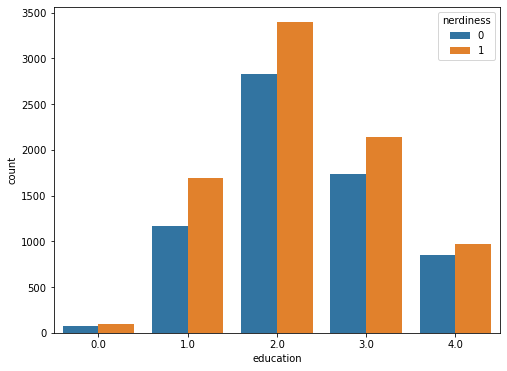

In [75]:
train_y = train.nerdiness
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='education', hue = train_y)

<AxesSubplot:xlabel='urban', ylabel='count'>

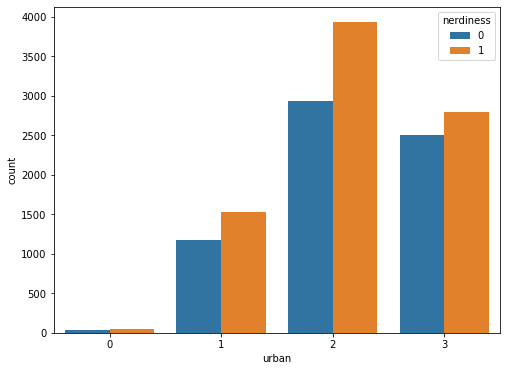

In [76]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='urban', hue = train_y)

<AxesSubplot:xlabel='gender', ylabel='count'>

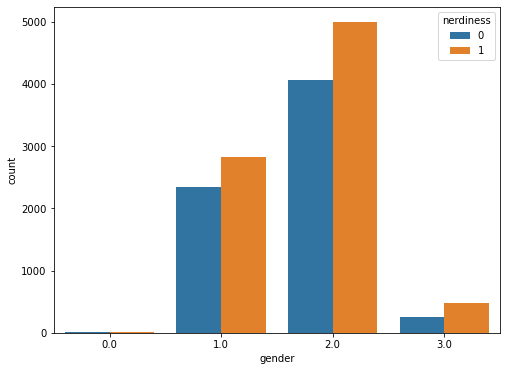

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='gender', hue = train_y)

<AxesSubplot:xlabel='engnat', ylabel='count'>

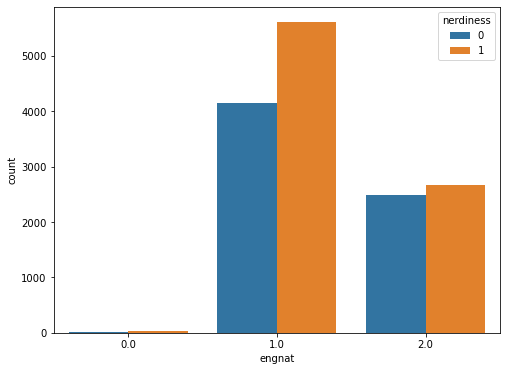

In [78]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='engnat', hue = train_y)

<AxesSubplot:xlabel='age', ylabel='count'>

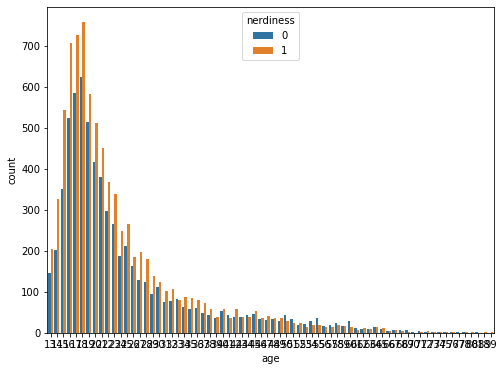

In [79]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='age', hue = train_y)

<AxesSubplot:xlabel='hand', ylabel='count'>

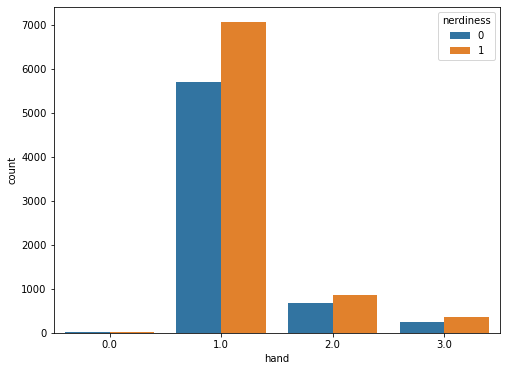

In [80]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='hand', hue = train_y)

<AxesSubplot:xlabel='religion', ylabel='count'>

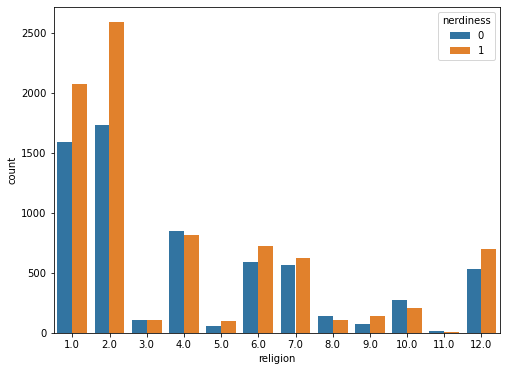

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='religion', hue = train_y)

<AxesSubplot:xlabel='orientation', ylabel='count'>

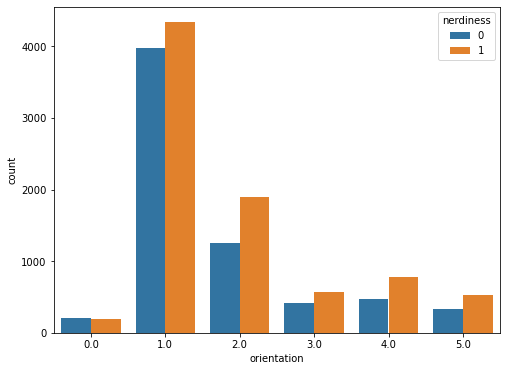

In [83]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='orientation', hue = train_y)

<AxesSubplot:xlabel='voted', ylabel='count'>

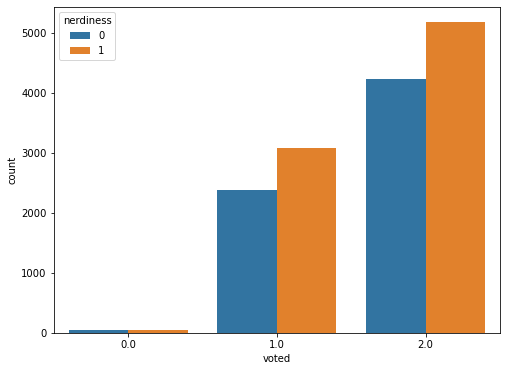

In [84]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='voted', hue = train_y)

<AxesSubplot:xlabel='married', ylabel='count'>

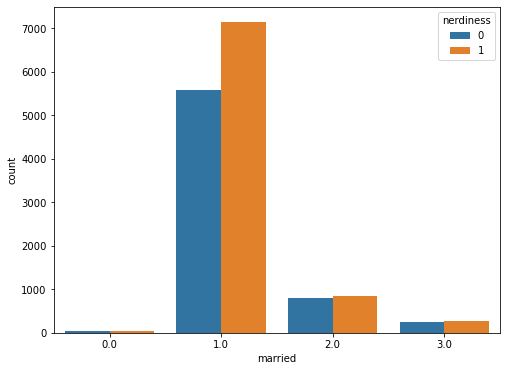

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='married', hue = train_y)

<AxesSubplot:xlabel='familysize', ylabel='count'>

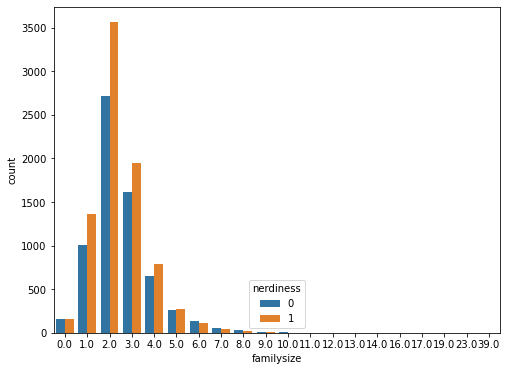

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='familysize', hue = train_y)

<AxesSubplot:xlabel='ASD', ylabel='count'>

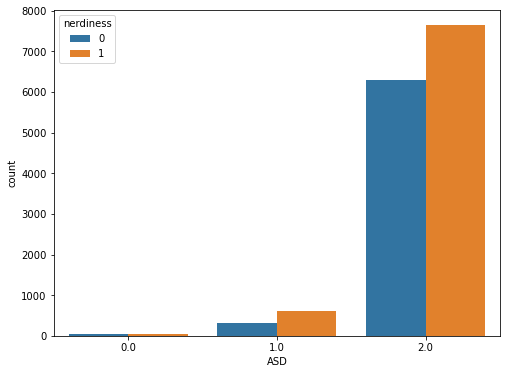

In [87]:
plt.figure(figsize=(8,6))
sns.countplot(data = train, x ='ASD', hue = train_y)

In [90]:
# 분류 작업에 필요한 함수 불러오기 
import jinja2
from pycaret.classification import*

# 실험환경 구축 (setup the environment)
- pycaret에서는 모델 학습 전 실험환경을 구축해야한다. Setup 함수를 통해 환경을 구축할 수 있다. 
setup 단계에서는 Pycaret이 자동으로 컬럼 형태를 인식한다. 그후 사용자에게 제대로 인식되었는지 
확인을 받게된다. 그때 enter를 눌러주면 된다. 
또한 주어진 데이터의 얼마를 사용하여 train/validation을 구축할지 묻게되는데, 
전체데이터를 사용하고 싶다면 enter를 눌러주면된다. 

In [91]:
# voted 컬럼이 예측대상이므로 target인자에 명시
clf = setup(data = train, target='nerdiness',fold_shuffle=True)

,Description,Value
0,session_id,910
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14942, 70)"
5,Missing Values,True
6,Numeric Features,50
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

# 모델 학습 및 비교 
- 환경을 구축했으니 pycaret에서 제공하는 기본 모델에 대해 학습하고 비교해보겠다 
compared_models 함수를 통해 15개의 기본 모델을 학습하고 성능을 비교할 수 있다. 
auc가 기준으로 성능이 가장 좋은 3개의 모델을 추려내어 저장해보겠다. 
본 대회 평가 지표가 auc이기 때문에 auc 기준으로 모델을 선정합니다. 

In [92]:
best_3 = compare_models(sort='AUC',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7702,0.8564,0.8396,0.7686,0.8023,0.5291,0.5327,0.2280
rf,Random Forest Classifier,0.7693,0.8530,0.8331,0.7707,0.8004,0.5280,0.5308,0.1990
catboost,CatBoost Classifier,0.7515,0.8231,0.8152,0.7568,0.7847,0.4918,0.4943,0.9100
xgboost,Extreme Gradient Boosting,0.7480,0.8170,0.7969,0.7611,0.7784,0.4866,0.4876,3.0700
lightgbm,Light Gradient Boosting Machine,0.7441,0.8157,0.8019,0.7536,0.7768,0.4777,0.4793,3.0160
gbc,Gradient Boosting Classifier,0.7347,0.8040,0.7992,0.7431,0.7698,0.4576,0.4599,0.4110
lda,Linear Discriminant Analysis,0.7271,0.7943,0.8073,0.7303,0.7668,0.4400,0.4434,0.0690
ada,Ada Boost Classifier,0.7227,0.7901,0.7780,0.7377,0.7571,0.4346,0.4357,0.1080
lr,Logistic Regression,0.7120,0.7812,0.7913,0.7190,0.7532,0.4094,0.4124,0.3850
nb,Naive Bayes,0.6909,0.7530,0.7985,0.6925,0.7417,0.3618,0.3676,0.0330


catBoost classifer, gradient boosting classifier, lgbm이 가장 좋은 3개의 모델임을 확인

# 모델앙상블
- 3개의 모델을 앙상블 시키도록 한다. 본 대회는 score최적화를 위해 확률값을 예측해야하므로 soft vote ensemble을 진행하겠다.

In [93]:
blended = blend_models(estimator_list = best_3, fold=5, method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.8520,0.8340,0.7723,0.8020,0.5315,0.5338
1,0.7639,0.8506,0.8580,0.7519,0.8014,0.5133,0.5201
2,0.7725,0.8512,0.8176,0.7825,0.7997,0.5367,0.5374
3,0.7749,0.8568,0.8442,0.7718,0.8064,0.5387,0.5418
4,0.7709,0.8545,0.8451,0.7666,0.8039,0.5301,0.5337
Mean,0.7706,0.8530,0.8398,0.7690,0.8027,0.5301,0.5333
SD,0.0037,0.0023,0.0135,0.0100,0.0023,0.0090,0.0073


# 모델예측
구축된 앙상블모델을 통해 예측을 해보겠습니다. 
setup 환경에 이미 hold-out set이 존재하므로 해당 데이터에 대해 예측을 하여 모델성능을 확인하겠습니다. 

In [94]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7852,0.8683,0.8519,0.7805,0.8146,0.5604,0.5634


# 전체 데이터에 대한 재학습
현재까지 실험은 주어진 train 데이터를 다시 한번 train/validaton으로 나눠서 실험을 한것으로, 전체 train에 대해 학습되어 있지 않습니다. 
최적의 성능을 위해 전체 데이터에 학습을 시켜주도록 하겠다. 

In [95]:
final_model = finalize_model(blended)

In [96]:
test = pd.read_csv("test.csv")

In [97]:
predictions = predict_model(final_model, data=test)

In [98]:
predictions

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,Label,Score
0,0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,...,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0,0,0.6649
1,1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,...,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0,1,0.7445
2,2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,...,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0,1,0.7714
3,3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,...,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1,0.5454
4,4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,...,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0,1,0.7202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,...,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0,1,0.7842
35448,35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,...,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0,1,0.7400
35449,35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0,1,0.8255
35450,35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,...,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0,0,0.5041


In [46]:
submission['nerdiness'] = predictions['Label']
submission.to_csv('submission_220805_3.csv', index=False)

In [47]:
submission

,index,nerdiness
0,0,0.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
35447,35447,1.0
35448,35448,1.0
35449,35449,1.0
35450,35450,0.0
